# Sizing Up a New Data Set

In [2]:
import urllib
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
sys.stdout.write("Number of Rows of Data = " + str(len(xList)) + '\n')
sys.stdout.write("Number of Columns of Data = " + str(len(xList[1])))


Number of Rows of Data = 208
Number of Columns of Data = 61

# Determining the Nature of Attributes

In [74]:
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
nrow = len(xList)
ncol = len(xList[1])

type = [0]*3
colCounts = []

for col in range(ncol):
    for row in xList:
        try:
            a = float(row[col])
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(row[col]) > 0:
                type[1] += 1
            else:
                type[2] += 1

    colCounts.append(type)
    type = [0]*3

sys.stdout.write("Col#" + '\t' + "Number" + '\t' + "Strings" + '\t ' + "Other\n")
iCol = 0
#I deleted one /t to make it align.
for types in colCounts:
    sys.stdout.write(str(iCol) + '\t' + str(types[0]) + '\t' +
                     str(types[1]) + '\t' + str(types[2]) + "\n")
    iCol += 1


Col#	Number	Strings	 Other
0	208	0	0
1	208	0	0
2	208	0	0
3	208	0	0
4	208	0	0
5	208	0	0
6	208	0	0
7	208	0	0
8	208	0	0
9	208	0	0
10	208	0	0
11	208	0	0
12	208	0	0
13	208	0	0
14	208	0	0
15	208	0	0
16	208	0	0
17	208	0	0
18	208	0	0
19	208	0	0
20	208	0	0
21	208	0	0
22	208	0	0
23	208	0	0
24	208	0	0
25	208	0	0
26	208	0	0
27	208	0	0
28	208	0	0
29	208	0	0
30	208	0	0
31	208	0	0
32	208	0	0
33	208	0	0
34	208	0	0
35	208	0	0
36	208	0	0
37	208	0	0
38	208	0	0
39	208	0	0
40	208	0	0
41	208	0	0
42	208	0	0
43	208	0	0
44	208	0	0
45	208	0	0
46	208	0	0
47	208	0	0
48	208	0	0
49	208	0	0
50	208	0	0
51	208	0	0
52	208	0	0
53	208	0	0
54	208	0	0
55	208	0	0
56	208	0	0
57	208	0	0
58	208	0	0
59	208	0	0
60	0	208	0


# Summary Statistics for Numeric and Categorical Attributes

In [75]:
from urllib.request import urlopen
import sys
import numpy as np
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
nrow = len(xList)
ncol = len(xList[1])
type = [0]*3
colCounts = []

#generate summary statistics for column 3 (e.g.)
col = 3
colData = []
for row in xList:
    colData.append(float(row[col]))

colArray = np.array(colData)
colMean = np.mean(colArray)
colsd = np.std(colArray)
sys.stdout.write("Mean = " + '\t' + str(colMean) + '\t\t' +
            "Standard Deviation = " + '\t ' + str(colsd) + "\n")


#calculate quantile boundaries
ntiles = 4

percentBdry = []

for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))

sys.stdout.write("\nBoundaries for 4 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")


#run again with 10 equal intervals
ntiles = 10

percentBdry = []

for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))

sys.stdout.write("Boundaries for 10 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")


#The last column contains categorical variables

col = 60
colData = []
for row in xList:
    colData.append(row[col])

unique = set(colData)
sys.stdout.write("Unique Label Values \n")
print(unique)

#count up the number of elements having each value

catDict = dict(zip(list(unique),range(len(unique))))

catCount = [0]*2

for elt in colData:
    catCount[catDict[elt]] += 1

sys.stdout.write("\nCounts for Each Value of Categorical Label \n")
print(list(unique))
print(catCount)


Mean = 	0.0538923076923		Standard Deviation = 	 0.0464159832226

Boundaries for 4 Equal Percentiles 
[0.0057999999999999996, 0.024375000000000001, 0.044049999999999999, 0.064500000000000002, 0.4264]
 
Boundaries for 10 Equal Percentiles 
[0.0057999999999999996, 0.0141, 0.022740000000000003, 0.027869999999999995, 0.036220000000000002, 0.044049999999999999, 0.050719999999999987, 0.059959999999999986, 0.077940000000000009, 0.10836, 0.4264]
 
Unique Label Values 
{'R', 'M'}

Counts for Each Value of Categorical Label 
['R', 'M']
[97, 111]


# Quantile‐Quantile Plot

In [83]:
import numpy as np
import pylab
import scipy.stats as stats
from urllib.request import urlopen
import sys
import numpy as np
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
nrow = len(xList)
ncol = len(xList[1])

type = [0]*3
colCounts = []

#generate summary statistics for column 3 (e.g.)
col = 3
colData = []
for row in xList:
    colData.append(float(row[col]))


stats.probplot(colData, dist="norm", plot=pylab)
pylab.show()


# Using Python Pandas to Read and Summarize Data

In [80]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#print head and tail of data frame
print(rocksVMines.head())
print(rocksVMines.tail())



       V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9 ...      V51     V52     V53     V54     V55     V56     V57  \
0  0.2111 ...   0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872 ...   0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194 ...   0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264 ...   0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459 ...   0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078

In [81]:
#print summary of data frame
summary = rocksVMines.describe()
print(summary)

               V0          V1          V2          V3          V4          V5  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               V6          V7          V8          V9     ...             V50  \
count  208.000000  208.000000  208.000000  208.000000     ...      208.000000   
mean     0.121747    0.134799    0.178003    0.208259     ...        0.016069   
std      0.061788    0.0851

# Parallel coordinates graph of rocks versus mines attributes

In [82]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

for i in range(208):
    #assign color based on color based on "M" or "R" labels
    if rocksVMines.iat[i,60] == "M":
        pcolor = "red"
    else:
        pcolor = "blue"

    #plot rows of data as if they were series data
    dataRow = rocksVMines.iloc[i,0:60]
    dataRow.plot(color=pcolor, alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()


# Cross Plotting Pairs of Attributes

In [84]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#calculate correlations between real-valued attributes
dataRow2 = rocksVMines.iloc[1,0:60]
dataRow3 = rocksVMines.iloc[2,0:60]

plot.scatter(dataRow2, dataRow3)


plot.xlabel("2nd Attribute")
plot.ylabel(("3rd Attribute"))
plot.show()

dataRow21 = rocksVMines.iloc[20,0:60]

plot.scatter(dataRow2, dataRow21)


plot.xlabel("2nd Attribute")
plot.ylabel(("21st Attribute"))
plot.show()

# Correlation between Classification Target and Real Attributes

In [85]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
from random import uniform
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#change the targets to numeric values
target = []
for i in range(208):
    #assign 0 or 1 target value based on "M" or "R" labels
    if rocksVMines.iat[i,60] == "M":
        target.append(1.0)
    else:
        target.append(0.0)

    #plot rows of data as if they were series data
dataRow = rocksVMines.iloc[0:208,35]
plot.scatter(dataRow, target)

plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()

#
#To improve the visualization, this version dithers the points a little
# and makes them somewhat transparent
target = []
for i in range(208):
    #assign 0 or 1 target value based on "M" or "R" labels
    # and add some dither
    if rocksVMines.iat[i,60] == "M":
        target.append(1.0 + uniform(-0.1, 0.1))
    else:
        target.append(0.0 + uniform(-0.1, 0.1))

    #plot rows of data as if they were series data
dataRow = rocksVMines.iloc[0:208,35]
plot.scatter(dataRow, target, alpha=0.5, s=120)

plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()


# Pearson’s Correlation Calculation for Attributes 2 versus 3 and 2 versus 21

In [86]:
import pandas as pd
from pandas import DataFrame
from math import sqrt
import sys
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#calculate correlations between real-valued attributes
dataRow2 = rocksVMines.iloc[1,0:60]
dataRow3 = rocksVMines.iloc[2,0:60]
dataRow21 = rocksVMines.iloc[20,0:60]

mean2 = 0.0; mean3 = 0.0; mean21 = 0.0
numElt = len(dataRow2)
for i in range(numElt):
    mean2 += dataRow2[i]/numElt
    mean3 += dataRow3[i]/numElt
    mean21 += dataRow21[i]/numElt

var2 = 0.0; var3 = 0.0; var21 = 0.0
for i in range(numElt):
    var2 += (dataRow2[i] - mean2) * (dataRow2[i] - mean2)/numElt
    var3 += (dataRow3[i] - mean3) * (dataRow3[i] - mean3)/numElt
    var21 += (dataRow21[i] - mean21) * (dataRow21[i] - mean21)/numElt

corr23 = 0.0; corr221 = 0.0
for i in range(numElt):
    corr23 += (dataRow2[i] - mean2) * \
              (dataRow3[i] - mean3) / (sqrt(var2*var3) * numElt)
    corr221 += (dataRow2[i] - mean2) * \
               (dataRow21[i] - mean21) / (sqrt(var2*var21) * numElt)

sys.stdout.write("Correlation between attribute 2 and 3 \n")
print(corr23)
sys.stdout.write(" \n")

sys.stdout.write("Correlation between attribute 2 and 21 \n")
print(corr221)
sys.stdout.write(" \n")


Correlation between attribute 2 and 3 
0.770938121191
 
Correlation between attribute 2 and 21 
0.466548080789
 


# Visualizing Attribute and Label Correlations Using a Heat Map

One way to check correlations with a large number of attributes is to calculate
the Pearson’s correlation coefficient for pairs of attributes, arrange those correlations
into a matrix where the ij‐th entry is the correlation between the ith
attribute and the jth attribute, and then plot them in a heat map

In [87]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#calculate correlations between real-valued attributes

corMat = DataFrame(rocksVMines.corr())

#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()

# Measuring Performance for Classifier Trained

Shape of xTrain array (138, 60)
Shape of yTrain array (138,)
Shape of xTest array (70, 60)
Shape of yTest array (70,)
Some values predicted by model [-0.10240253  0.42090698  0.38593034  0.36094537  0.31520494] [ 1.11094176  1.12242751  0.77626699  1.02016858  0.66338081]
tp = 68.0	fn = 6.0
fp = 7.0	tn = 57.0

tp = 34.0	fn = 3.0
fp = 14.0	tn = 19.0

AUC for in-sample ROC curve: 0.979519


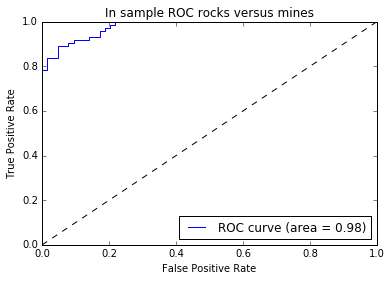

AUC for out-of-sample ROC curve: 0.848485


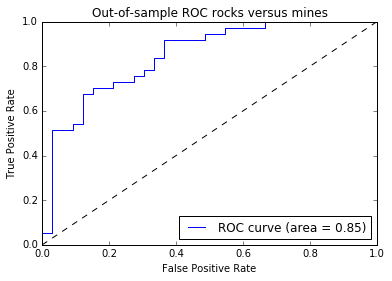

In [22]:

import numpy
import random
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc
import pylab as pl

from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)


def confusionMatrix(predicted, actual, threshold):
    if len(predicted) != len(actual): return -1
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(len(actual)):
        if actual[i] > 0.5: #labels that are 1.0  (positive examples)
            if predicted[i] > threshold:
                tp += 1.0 #correctly predicted positive
            else:
                fn += 1.0 #incorrectly predicted negative
        else:              #labels that are 0.0 (negative examples)
            if predicted[i] < threshold:
                tn += 1.0 #correctly predicted negative
            else:
                fp += 1.0 #incorrectly predicted positive
    rtn = [tp, fn, fp, tn]
    return rtn



#arrange data into list for labels and list of lists for attributes
xList = []
labels = []

for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    #assign label 1.0 for "M" and 0.0 for "R"
    if(row[-1] == 'M'):
        labels.append(1.0)
    else:
        labels.append(0.0)
    #remove label from row
    row.pop()
    #convert row to floats
    floatRow = [float(num) for num in row]
    xList.append(floatRow)

#divide attribute matrix and label vector into training(2/3 of data) and test sets (1/3 of data)
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

#form list of list input into numpy arrays to match input class for scikit-learn linear model
xTrain = numpy.array(xListTrain); yTrain = numpy.array(labelsTrain); xTest = numpy.array(xListTest); yTest = numpy.array(labelsTest)

#check shapes to see what they look like
print("Shape of xTrain array", xTrain.shape)
print("Shape of yTrain array", yTrain.shape)
print("Shape of xTest array", xTest.shape)
print("Shape of yTest array", yTest.shape)

#train linear regression model
rocksVMinesModel = linear_model.LinearRegression()
rocksVMinesModel.fit(xTrain,yTrain)

#generate predictions on in-sample error
trainingPredictions = rocksVMinesModel.predict(xTrain)
print("Some values predicted by model", trainingPredictions[0:5], trainingPredictions[-6:-1])

#generate confusion matrix for predictions on training set (in-sample
confusionMatTrain = confusionMatrix(trainingPredictions, yTrain, 0.5)
#pick threshold value and generate confusion matrix entries
tp = confusionMatTrain[0]; fn = confusionMatTrain[1]; fp = confusionMatTrain[2]; tn = confusionMatTrain[3]

print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " + str(fp) + "\ttn = " + str(tn) + '\n')

#generate predictions on out-of-sample data
testPredictions = rocksVMinesModel.predict(xTest)

#generate confusion matrix from predictions on out-of-sample data
conMatTest = confusionMatrix(testPredictions, yTest, 0.25)
#pick threshold value and generate confusion matrix entries
tp = conMatTest[0]; fn = conMatTest[1]; fp = conMatTest[2]; tn = conMatTest[3]
print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " + str(fp) + "\ttn = " + str(tn) + '\n')

#generate ROC curve for in-sample

fpr, tpr, thresholds = roc_curve(yTrain,trainingPredictions)
roc_auc = auc(fpr, tpr)
print( 'AUC for in-sample ROC curve: %f' % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

#generate ROC curve for out-of-sample
fpr, tpr, thresholds = roc_curve(yTest,testPredictions)
roc_auc = auc(fpr, tpr)
print( 'AUC for out-of-sample ROC curve: %f' % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out-of-sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

# Using Ridge Regression

AUC             alpha
0.841113841114 999.9999999999999
0.864045864046 99.99999999999999
0.907452907453 10.0
0.9180999181 1.0
0.882882882883 0.1
0.861588861589 0.010000000000000002
0.851760851761 0.0010000000000000002
0.850941850942 0.00010000000000000002
0.849303849304 1.0000000000000003e-05


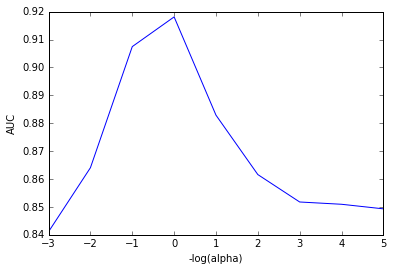

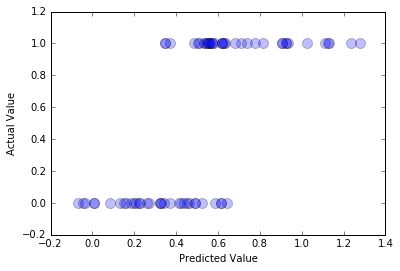

In [27]:

import numpy
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc
import pylab as plt

from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)


#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    #assign label 1.0 for "M" and 0.0 for "R"
    if(row[-1] == 'M'):
        labels.append(1.0)
    else:
        labels.append(0.0)
        #remove lable from row
    row.pop()
    #convert row to floats
    floatRow = [float(num) for num in row]
    xList.append(floatRow)

#divide attribute matrix and label vector into training(2/3 of data) and test sets (1/3 of data)
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

#form list of list input into numpy arrays to match input class for scikit-learn linear model
xTrain = numpy.array(xListTrain); yTrain = numpy.array(labelsTrain); xTest = numpy.array(xListTest); yTest = numpy.array(labelsTest)

alphaList = [0.1**i for i in [-3, -2, -1, 0,1, 2, 3, 4, 5]]

aucList = []
for alph in alphaList:
    rocksVMinesRidgeModel = linear_model.Ridge(alpha=alph)
    rocksVMinesRidgeModel.fit(xTrain, yTrain)
    fpr, tpr, thresholds = roc_curve(yTest,rocksVMinesRidgeModel.predict(xTest))
    roc_auc = auc(fpr, tpr)
    aucList.append(roc_auc)


print("AUC             alpha")
for i in range(len(aucList)):
    print(aucList[i], alphaList[i])

#plot auc values versus alpha values
x = [-3, -2, -1, 0,1, 2, 3, 4, 5]
plt.plot(x, aucList)
plt.xlabel('-log(alpha)')
plt.ylabel('AUC')
plt.show()

#visualize the performance of the best classifier
indexBest = aucList.index(max(aucList))
alph = alphaList[indexBest]
rocksVMinesRidgeModel = linear_model.Ridge(alpha=alph)
rocksVMinesRidgeModel.fit(xTrain, yTrain)

#scatter plot of actual vs predicted
plt.scatter(rocksVMinesRidgeModel.predict(xTest), yTest, s=100, alpha=0.25)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()


# Converting a Classification problem to an Ordinary Regression Problem by Assigning Numeric Values to Binary Labels

['V10', 'V48', 'V44', 'V11', 'V35', 'V51', 'V20', 'V3', 'V21', 'V15', 'V43', 'V0', 'V22', 'V45', 'V53', 'V27', 'V30', 'V50', 'V58', 'V46', 'V56', 'V28', 'V39']


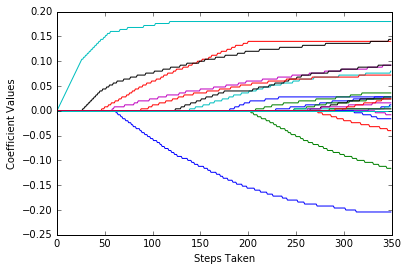

In [4]:
import numpy
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc
#import pylab as plt
from math import sqrt
import matplotlib.pyplot as plot
%matplotlib inline
import sys

from urllib.request import urlopen
import urllib
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []


for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)

#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1.0)
    else:
        labels.append(0.0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrow = len(xNum)
ncol = len(xNum[1])

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncol):
    col = [xNum[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    xMeans.append(mean)
    colDiff = [(xNum[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xNum
xNormalized = []
for i in range(nrow):
    rowNormalized = [(xNum[i][j] - xMeans[j])/xSD[j] for j in range(ncol)]
    xNormalized.append(rowNormalized)

#Normalize labels
meanLabel = sum(labels)/nrow
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrow)])/nrow)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrow)]

#initialize a vector of coefficients beta
beta = [0.0] * ncol

#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))


#number of steps to take
nSteps = 350
stepSize = 0.004
nzList = []

for i in range(nSteps):
    #calculate residuals
    residuals = [0.0] * nrow
    for j in range(nrow):
        labelsHat = sum([xNormalized[j][k] * beta[k] for k in range(ncol)])
        residuals[j] = labelNormalized[j] - labelsHat

    #calculate correlation between attribute columns from normalized wine and residual
    corr = [0.0] * ncol

    for j in range(ncol):
        corr[j] = sum([xNormalized[k][j] * residuals[k] for k in range(nrow)]) / nrow

    iStar = 0
    corrStar = corr[0]

    for j in range(1, (ncol)):
        if abs(corrStar) < abs(corr[j]):
            iStar = j; corrStar = corr[j]

    beta[iStar] += stepSize * corrStar / abs(corrStar)
    betaMat.append(list(beta))


    nzBeta = [index for index in range(ncol) if beta[index] != 0.0]
    for q in nzBeta:
        if (q in nzList) == False:
            nzList.append(q)

#make up names for columns of xNum
names = ['V' + str(i) for i in range(ncol)]
nameList = [names[nzList[i]] for i in range(len(nzList))]

print(nameList)
for i in range(ncol):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nSteps)]
    xaxis = range(nSteps)
    plot.plot(xaxis, coefCurve)

plot.xlabel("Steps Taken")
plot.ylabel(("Coefficient Values"))
plot.show()



# Using ElasticNet Regression to Build a Binary (Two-Class) Classifier

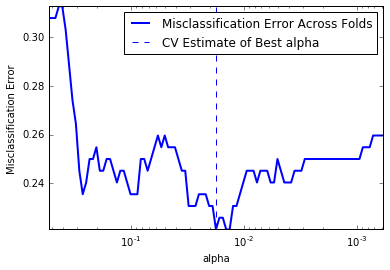

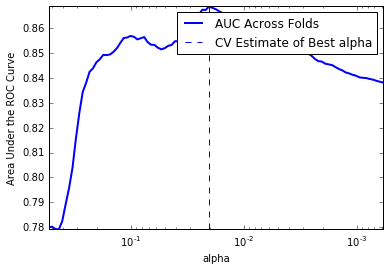

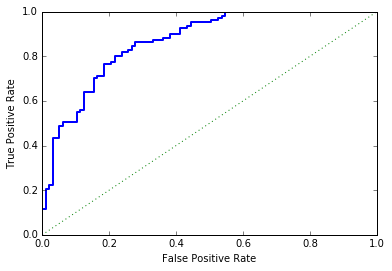

Best Value of Misclassification Error =  0.22115384615384615
Best alpha for Misclassification Error =  0.0176862447202

Best Value for AUC =  0.868672796508
Best alpha for AUC   =   0.0203348835893

Confusion Matrices for Different Threshold Values
Threshold Value =    -0.486641888022
TP =  108.0 FP =  52.0
FN =  3.0 TN =  45.0
Threshold Value =    -0.158579744682
TP =  92.0 FP =  26.0
FN =  19.0 TN =  71.0
Threshold Value =    0.785342293156
TP =  25.0 FP =  3.0
FN =  86.0 TN =  94.0


In [12]:
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn.linear_model import enet_path
from sklearn.metrics import roc_auc_score, roc_curve
import numpy

import urllib
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)

#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1.0)
    else:
        labels.append(0.0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrow = len(xNum)
ncol = len(xNum[1])

alpha = 1.0

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncol):
    col = [xNum[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    xMeans.append(mean)
    colDiff = [(xNum[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xNum
xNormalized = []
for i in range(nrow):
    rowNormalized = [(xNum[i][j] - xMeans[j])/xSD[j] for j in range(ncol)]
    xNormalized.append(rowNormalized)

#normalize labels to center
#Normalize labels
meanLabel = sum(labels)/nrow
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrow)])/nrow)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrow)]

#number of cross validation folds
nxval = 10


for ixval in range(nxval):
    #Define test and training index sets
    idxTest = [a for a in range(nrow) if a%nxval == ixval%nxval]
    idxTrain = [a for a in range(nrow) if a%nxval != ixval%nxval]

    #Define test and training attribute and label sets
    xTrain = numpy.array([xNormalized[r] for r in idxTrain])
    xTest = numpy.array([xNormalized[r] for r in idxTest])
    labelTrain = numpy.array([labelNormalized[r] for r in idxTrain])
    labelTest = numpy.array([labelNormalized[r] for r in idxTest])
    alphas, coefs, _ = enet_path(xTrain, labelTrain,l1_ratio=0.8, fit_intercept=False, return_models=False)

    #apply coefs to test data to produce predictions and accumulate
    if ixval == 0:
        pred = numpy.dot(xTest, coefs)
        yOut = labelTest
    else:
        #accumulate predictions
        yTemp = numpy.array(yOut)
        yOut = numpy.concatenate((yTemp, labelTest), axis=0)

        #accumulate predictions
        predTemp = numpy.array(pred)
        pred = numpy.concatenate((predTemp, numpy.dot(xTest, coefs)), axis = 0)


#calculate miss classification error
misClassRate = []
_,nPred = pred.shape
for iPred in range(1, nPred):
    predList = list(pred[:, iPred])
    errCnt = 0.0
    for irow in range(nrow):
        if (predList[irow] < 0.0) and (yOut[irow] >= 0.0):
            errCnt += 1.0
        elif (predList[irow] >= 0.0) and (yOut[irow] < 0.0):
            errCnt += 1.0
    misClassRate.append(errCnt/nrow)

#find minimum point for plot and for print
minError = min(misClassRate)
idxMin = misClassRate.index(minError)
plotAlphas = list(alphas[1:len(alphas)])

plot.figure()
plot.plot(plotAlphas, misClassRate, label='Misclassification Error Across Folds', linewidth=2)
plot.axvline(plotAlphas[idxMin], linestyle='--',
            label='CV Estimate of Best alpha')
plot.legend()
plot.semilogx()
ax = plot.gca()
ax.invert_xaxis()
plot.xlabel('alpha')
plot.ylabel('Misclassification Error')
plot.axis('tight')
plot.show()



#calculate AUC.
idxPos = [i for i in range(nrow) if yOut[i] > 0.0]
yOutBin = [0] * nrow
for i in idxPos: yOutBin[i] = 1

auc = []
for iPred in range(1, nPred):
    predList = list(pred[:, iPred])
    aucCalc = roc_auc_score(yOutBin, predList)
    auc.append(aucCalc)

maxAUC = max(auc)
idxMax = auc.index(maxAUC)

plot.figure()
plot.plot(plotAlphas, auc, label='AUC Across Folds', linewidth=2)
plot.axvline(plotAlphas[idxMax], linestyle='--',
            label='CV Estimate of Best alpha')
plot.legend()
plot.semilogx()
ax = plot.gca()
ax.invert_xaxis()
plot.xlabel('alpha')
plot.ylabel('Area Under the ROC Curve')
plot.axis('tight')
plot.show()


#plot best version of ROC curve
fpr, tpr, thresh = roc_curve(yOutBin, list(pred[:, idxMax]))
ctClass = [i*0.01 for i in range(101)]

plot.plot(fpr, tpr, linewidth=2)
plot.plot(ctClass, ctClass, linestyle=':')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.show()

print('Best Value of Misclassification Error = ', misClassRate[idxMin])
print('Best alpha for Misclassification Error = ', plotAlphas[idxMin])
print('')
print('Best Value for AUC = ', auc[idxMax])
print('Best alpha for AUC   =  ', plotAlphas[idxMax])

print('')
print('Confusion Matrices for Different Threshold Values')

#pick some points along the curve to print.  There are 208 points.  The extremes aren't useful
#Sample at 52, 104 and 156.  Use the calculated values of tpr and fpr along with definitions and
#threshold values.
#Some nomenclature (e.g. see wikkipedia "receiver operating curve")


#P = Positive cases
P = len(idxPos)
#N = Negative cases
N = nrow - P
#TP = True positives = tpr * P
TP = tpr[52] * P
#FN = False negatives = P - TP
FN = P - TP
#FP = False positives = fpr * N
FP = fpr[52] * N
#TN = True negatives = N - FP
TN = N - FP

print('Threshold Value =   ', thresh[52])
print('TP = ', TP, 'FP = ', FP)
print('FN = ', FN, 'TN = ', TN)

TP = tpr[32] * P; FN = P - TP; FP = fpr[32] * N; TN = N - FP

print('Threshold Value =   ', thresh[32])
print('TP = ', TP, 'FP = ', FP)
print('FN = ', FN, 'TN = ', TN)

TP = tpr[6] * P; FN = P - TP; FP = fpr[6] * N; TN = N - FP

print('Threshold Value =   ', thresh[6])
print('TP = ', TP, 'FP = ', FP)
print('FN = ', FN, 'TN = ', TN)

# Coefficient Trajectories for ElasticNet Trained on Rocks versus Mines Data

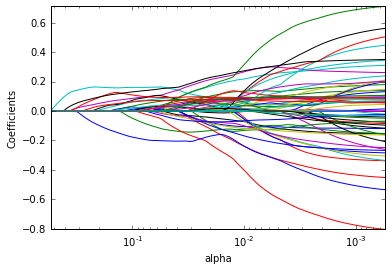

Attributes Ordered by How Early They Enter the Model
['V10', 'V48', 'V11', 'V44', 'V35', 'V51', 'V20', 'V3', 'V21', 'V45', 'V43', 'V15', 'V0', 'V22', 'V27', 'V50', 'V53', 'V30', 'V58', 'V56', 'V28', 'V39', 'V46', 'V19', 'V54', 'V29', 'V57', 'V6', 'V8', 'V7', 'V49', 'V2', 'V23', 'V37', 'V55', 'V4', 'V13', 'V36', 'V38', 'V26', 'V31', 'V1', 'V34', 'V33', 'V24', 'V16', 'V17', 'V5', 'V52', 'V41', 'V40', 'V59', 'V12', 'V9', 'V18', 'V14', 'V47', 'V42']

Best Coefficient Values 
[0.082258256813765362, 0.0020619887220049708, -0.11828642590855749, 0.16633956932499508, 0.0042854388193718151, -0.0, -0.043662524745939846, -0.077515104879432029, 0.10000054356324138, 0.0, 0.090617207036278194, 0.21210870399915979, -0.0, -0.01065538614982325, -0.0, -0.13328659558143635, -0.0, 0.0, 0.0, 0.052814854501417319, 0.038531154796720188, 0.0035515348181845035, 0.090854714680383225, 0.030316113904023091, -0.0, 0.0, 0.008619554235748025, 0.0, 0.0, 0.17497679257272619, -0.2215687804617211, 0.012614243827936522, 0

In [14]:
import urllib
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
    
    
#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1.0)
    else:
        labels.append(0.0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrow = len(xNum)
ncol = len(xNum[1])

alpha = 1.0

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncol):
    col = [xNum[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    xMeans.append(mean)
    colDiff = [(xNum[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xNum
xNormalized = []
for i in range(nrow):
    rowNormalized = [(xNum[i][j] - xMeans[j])/xSD[j] for j in range(ncol)]
    xNormalized.append(rowNormalized)

#normalize labels to center

meanLabel = sum(labels)/nrow
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrow)])/nrow)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrow)]

#Convert normalized labels to numpy array
Y = numpy.array(labelNormalized)

#Convert normalized attributes to numpy array
X = numpy.array(xNormalized)

alphas, coefs, _ = enet_path(X, Y,l1_ratio=0.8, fit_intercept=False, return_models=False)

plot.plot(alphas,coefs.T)

plot.xlabel('alpha')
plot.ylabel('Coefficients')
plot.axis('tight')
plot.semilogx()
ax = plot.gca()
ax.invert_xaxis()
plot.show()

nattr, nalpha = coefs.shape

#find coefficient ordering
nzList = []
for iAlpha in range(1,nalpha):
    coefList = list(coefs[: ,iAlpha])
    nzCoef = [index for index in range(nattr) if coefList[index] != 0.0]
    for q in nzCoef:
        if not(q in nzList):
            nzList.append(q)

#make up names for columns of X
names = ['V' + str(i) for i in range(ncol)]
nameList = [names[nzList[i]] for i in range(len(nzList))]
print("Attributes Ordered by How Early They Enter the Model")
print(nameList)
print('')
#find coefficients corresponding to best alpha value. alpha value corresponding to
#normalized X and normalized Y is 0.020334883589342503

alphaStar = 0.020334883589342503
indexLTalphaStar = [index for index in range(100) if alphas[index] > alphaStar]
indexStar = max(indexLTalphaStar)

#here's the set of coefficients to deploy
coefStar = list(coefs[:,indexStar])
print("Best Coefficient Values ")
print(coefStar)
print('')
#The coefficients on normalized attributes give another slightly different ordering

absCoef = [abs(a) for a in coefStar]

#sort by magnitude
coefSorted = sorted(absCoef, reverse=True)

idxCoefSize = [absCoef.index(a) for a in coefSorted if not(a == 0.0)]

namesList2 = [names[idxCoefSize[i]] for i in range(len(idxCoefSize))]

print("Attributes Ordered by Coef Size at Optimum alpha")
print(namesList2)

# Penalized Logistic Regression Trained on Rocks versus Mines Data

Attributes Ordered by How Early They Enter the Model
['V10', 'V48', 'V11', 'V44', 'V35', 'V51', 'V20', 'V3', 'V50', 'V21', 'V43', 'V47', 'V15', 'V27', 'V0', 'V22', 'V36', 'V30', 'V53', 'V56', 'V58', 'V6', 'V19', 'V28', 'V39', 'V49', 'V7', 'V23', 'V54', 'V8', 'V14', 'V2', 'V29', 'V38', 'V57', 'V45', 'V13', 'V32', 'V31', 'V42', 'V16', 'V37', 'V59', 'V52', 'V25', 'V18', 'V1', 'V33', 'V4', 'V55', 'V17', 'V46', 'V26', 'V12', 'V40', 'V34', 'V5', 'V24', 'V41', 'V9']


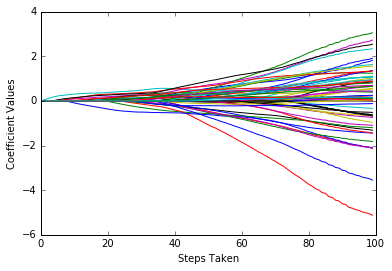

In [4]:
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
%matplotlib inline

def S(z,gamma):
    if gamma >= fabs(z):
        return 0.0
    if z > 0.0:
        return z - gamma
    else:
        return z + gamma

def Pr(b0,b,x):
    n = len(x)
    sum = b0
    for i in range(n):
        sum += b[i]*x[i]
        if sum < -100: sum = -100
    return 1.0/(1.0 + exp(-sum))

import urllib
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []

for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1.0)
    else:
        labels.append(0.0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrow = len(xNum)
ncol = len(xNum[1])

alpha = 0.8
#calculate means and variances
xMeans = []
xSD = []
for i in range(ncol):
    col = [xNum[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    xMeans.append(mean)
    colDiff = [(xNum[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xNum
xNormalized = []
for i in range(nrow):
    rowNormalized = [(xNum[i][j] - xMeans[j])/xSD[j] for j in range(ncol)]
    xNormalized.append(rowNormalized)

#Do Not Normalize labels but do calculate averages
meanLabel = sum(labels)/nrow
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrow)])/nrow)

#initialize probabilities and weights
sumWxr = [0.0] * ncol
sumWxx = [0.0] * ncol
sumWr = 0.0
sumW = 0.0

#calculate starting points for betas
for iRow in range(nrow):
    p = meanLabel
    w = p * (1.0 - p)
    #residual for logistic
    r = (labels[iRow] - p) / w
    x = xNormalized[iRow]
    sumWxr = [sumWxr[i] + w * x[i] * r for i in range(ncol)]
    sumWxx = [sumWxx[i] + w * x[i] * x[i] for i in range(ncol)]
    sumWr = sumWr + w * r
    sumW = sumW + w

avgWxr = [sumWxr[i]/nrow for i in range(ncol)]
avgWxx = [sumWxx[i]/nrow for i in range(ncol)]

maxWxr = 0.0
for i in range(ncol):
    val = abs(avgWxr[i])
    if val > maxWxr:
        maxWxr = val

#calculate starting value for lambda
lam = maxWxr/alpha

#this value of lambda corresponds to beta = list of 0's
#initialize a vector of coefficients beta
beta = [0.0] * ncol
beta0 = sumWr/sumW

#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))

beta0List = []
beta0List.append(beta0)

#begin iteration
nSteps = 100
lamMult = 0.93 #100 steps gives reduction by factor of 1000 in lambda (recommended by authors)
nzList = []
for iStep in range(nSteps):
    #decrease lambda
    lam = lam * lamMult


    #Use incremental change in betas to control inner iteration


    #set middle loop values for betas = to outer values
    # values are used for calculating weights and probabilities
    #inner values are used for calculating penalized regression updates

    #take pass through data to calculate averages over data require for iteration
    #initilize accumulators

    betaIRLS = list(beta)
    beta0IRLS = beta0
    distIRLS = 100.0
    #Middle loop to calculate new betas with fixed IRLS weights and probabilities
    iterIRLS = 0
    while distIRLS > 0.01:
        iterIRLS += 1
        iterInner = 0.0

        betaInner = list(betaIRLS)
        beta0Inner = beta0IRLS
        distInner = 100.0
        while distInner > 0.01:
            iterInner += 1
            if iterInner > 100: break

            #cycle through attributes and update one-at-a-time
            #record starting value for comparison
            betaStart = list(betaInner)
            for iCol in range(ncol):

                sumWxr = 0.0
                sumWxx = 0.0
                sumWr = 0.0
                sumW = 0.0

                for iRow in range(nrow):
                    x = list(xNormalized[iRow])
                    y = labels[iRow]
                    p = Pr(beta0IRLS, betaIRLS, x)
                    if abs(p) < 1e-5:
                        p = 0.0
                        w = 1e-5
                    elif abs(1.0 - p) < 1e-5:
                        p = 1.0
                        w = 1e-5
                    else:
                        w = p * (1.0 - p)

                    z = (y - p) / w + beta0IRLS + sum([x[i] * betaIRLS[i] for i in range(ncol)])
                    r = z - beta0Inner - sum([x[i] * betaInner[i] for i in range(ncol)])
                    sumWxr += w * x[iCol] * r
                    sumWxx += w * x[iCol] * x[iCol]
                    sumWr += w * r
                    sumW += w

                avgWxr = sumWxr / nrow
                avgWxx = sumWxx / nrow

                beta0Inner = beta0Inner + sumWr / sumW
                uncBeta = avgWxr + avgWxx * betaInner[iCol]
                betaInner[iCol] = S(uncBeta, lam * alpha) / (avgWxx + lam * (1.0 - alpha))

            sumDiff = sum([abs(betaInner[n] - betaStart[n]) for n in range(ncol)])
            sumBeta = sum([abs(betaInner[n]) for n in range(ncol)])
            distInner = sumDiff/sumBeta
        #print number of steps for inner and middle loop convergence to monitor behavior
        #print(iStep, iterIRLS, iterInner)

        #if exit inner while loop, then set betaMiddle = betaMiddle and run through middle loop again.

        #Check change in betaMiddle to see if IRLS is converged
        a = sum([abs(betaIRLS[i] - betaInner[i]) for i in range(ncol)])
        b = sum([abs(betaIRLS[i]) for i in range(ncol)])
        distIRLS = a / (b + 0.0001)
        dBeta = [betaInner[i] - betaIRLS[i] for i in range(ncol)]
        gradStep = 1.0
        temp = [betaIRLS[i] + gradStep * dBeta[i] for i in range(ncol)]
        betaIRLS = list(temp)

    beta = list(betaIRLS)
    beta0 = beta0IRLS
    betaMat.append(list(beta))
    beta0List.append(beta0)

    nzBeta = [index for index in range(ncol) if beta[index] != 0.0]
    for q in nzBeta:
        if not(q in nzList):
            nzList.append(q)

#make up names for columns of xNum
names = ['V' + str(i) for i in range(ncol)]
nameList = [names[nzList[i]] for i in range(len(nzList))]

print("Attributes Ordered by How Early They Enter the Model")
print(nameList)
for i in range(ncol):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nSteps)]
    xaxis = range(nSteps)
    plot.plot(xaxis, coefCurve)

plot.xlabel("Steps Taken")
plot.ylabel("Coefficient Values")
plot.show()


# Classifying using Random Forest

AUC
0.945740365112


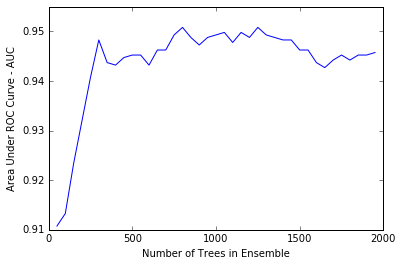

[10 11  8 20  9 51 48 19 42 47  0 12 35 46  3 16 44  4 45 36 27 26 15 43 50
  5 22 18 38 41 34 17 21 14 25  1 53  7  6 13 39 23 52 30 54 31 24 33 32  2
 28 37 49 29 57 58 40 59 55 56]


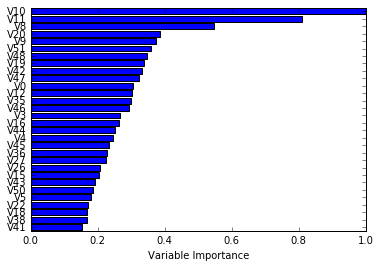

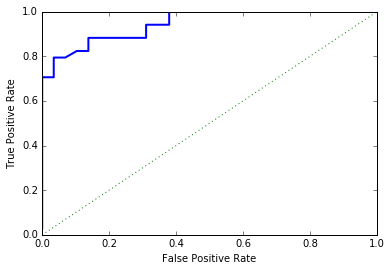


Confusion Matrices for Different Threshold Values

Threshold Value =    0.636923076923
TP =  0.428571428571 FP =  0.015873015873
FN =  0.111111111111 TN =  0.444444444444

Threshold Value =    0.625128205128
TP =  0.444444444444 FP =  0.0634920634921
FN =  0.0952380952381 TN =  0.396825396825

Threshold Value =    0.557435897436
TP =  0.507936507937 FP =  0.142857142857
FN =  0.031746031746 TN =  0.31746031746


In [6]:
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve
import numpy

import urllib
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []

for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0


#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1)
    else:
        labels.append(0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrows = len(xNum)
ncols = len(xNum[1])

#form x and y into numpy arrays and make up column names
X = numpy.array(xNum)
y = numpy.array(labels)
rocksVMinesNames = numpy.array(['V' + str(i) for i in range(ncols)])

#break into training and test sets.
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=531)

auc = []
nTreeList = range(50, 2000, 50)
for iTrees in nTreeList:
    depth = None
    maxFeat  = 8 #try tweaking
    rocksVMinesRFModel = ensemble.RandomForestClassifier(n_estimators=iTrees, max_depth=depth, max_features=maxFeat,
                                                 oob_score=False, random_state=531)

    rocksVMinesRFModel.fit(xTrain,yTrain)

    #Accumulate auc on test set
    prediction = rocksVMinesRFModel.predict_proba(xTest)
    aucCalc = roc_auc_score(yTest, prediction[:,1:2])
    auc.append(aucCalc)

print("AUC" )
print(auc[-1])


#plot training and test errors vs number of trees in ensemble
plot.plot(nTreeList, auc)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Area Under ROC Curve - AUC')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

# Plot feature importance
featureImportance = rocksVMinesRFModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()

#plot importance of top 30
idxSorted = numpy.argsort(featureImportance)[30:60]
idxTemp = numpy.argsort(featureImportance)[::-1]
print(idxTemp)
barPos = numpy.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, rocksVMinesNames[idxSorted])
plot.xlabel('Variable Importance')
plot.show()

#plot best version of ROC curve
fpr, tpr, thresh = roc_curve(yTest, list(prediction[:,1:2]))
ctClass = [i*0.01 for i in range(101)]

plot.plot(fpr, tpr, linewidth=2)
plot.plot(ctClass, ctClass, linestyle=':')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.show()

#pick some threshold values and calc confusion matrix for best predictions
#notice that GBM predictions don't fall in range of (0, 1)
#pick threshold values at 25th, 50th and 75th percentiles
idx25 = int(len(thresh) * 0.25)
idx50 = int(len(thresh) * 0.50)
idx75 = int(len(thresh) * 0.75)

#calculate total points, total positives and total negatives
totalPts = len(yTest)
P = sum(yTest)
N = totalPts - P

print('')
print('Confusion Matrices for Different Threshold Values')

#25th
TP = tpr[idx25] * P; FN = P - TP; FP = fpr[idx25] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx25])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)

#50th
TP = tpr[idx50] * P; FN = P - TP; FP = fpr[idx50] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx50])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)

#75th
TP = tpr[idx75] * P; FN = P - TP; FP = fpr[idx75] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx75])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)


# Printed Output:
#
# AUC
# 0.950304259635
#
# Confusion Matrices for Different Threshold Values
#
# ('Threshold Value =   ', 0.76051282051282054)
# ('TP = ', 0.25396825396825395, 'FP = ', 0.0)
# ('FN = ', 0.2857142857142857, 'TN = ', 0.46031746031746029)
#
# ('Threshold Value =   ', 0.62461538461538457)
# ('TP = ', 0.46031746031746029, 'FP = ', 0.047619047619047616)
# ('FN = ', 0.079365079365079361, 'TN = ', 0.41269841269841268)
#
# ('Threshold Value =   ', 0.46564102564102566)
# ('TP = ', 0.53968253968253965, 'FP = ', 0.22222222222222221)
# ('FN = ', 0.0, 'TN = ', 0.23809523809523808)

# Using Gradient Boosting

Best AUC
0.956389452333
Number of Trees for Best AUC
1545


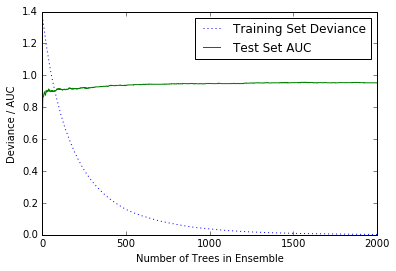

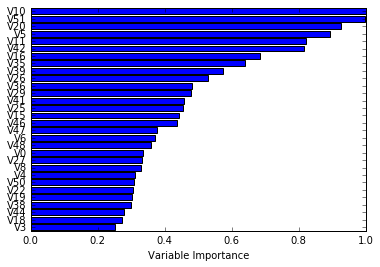

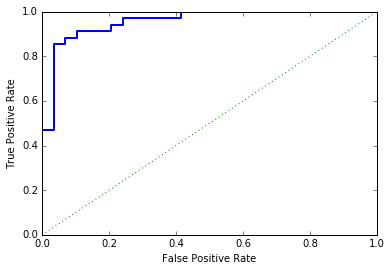


Confusion Matrices for Different Threshold Values

Threshold Value =    2.0666970222
TP =  0.460317460317 FP =  0.015873015873
FN =  0.0793650793651 TN =  0.444444444444

Threshold Value =    1.35348369871
TP =  0.492063492063 FP =  0.047619047619
FN =  0.047619047619 TN =  0.412698412698

Threshold Value =    0.432925123813
TP =  0.52380952381 FP =  0.111111111111
FN =  0.015873015873 TN =  0.349206349206


In [8]:
import urllib
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []

for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1)
    else:
        labels.append(0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrows = len(xNum)
ncols = len(xNum[1])

#form x and y into numpy arrays and make up column names
X = numpy.array(xNum)
y = numpy.array(labels)
rockVMinesNames = numpy.array(['V' + str(i) for i in range(ncols)])

#break into training and test sets.
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=531)

#instantiate model
nEst = 2000
depth = 3
learnRate = 0.007
maxFeatures = 20
rockVMinesGBMModel = ensemble.GradientBoostingClassifier(n_estimators=nEst, max_depth=depth,
                                                         learning_rate=learnRate,
                                                         max_features=maxFeatures)
#train
rockVMinesGBMModel.fit(xTrain, yTrain)

# compute auc on test set as function of ensemble size
auc = []
aucBest = 0.0
predictions = rockVMinesGBMModel.staged_decision_function(xTest)
for p in predictions:
    aucCalc = roc_auc_score(yTest, p)
    auc.append(aucCalc)

    #capture best predictions
    if aucCalc > aucBest:
        aucBest = aucCalc
        pBest = p

idxBest = auc.index(max(auc))

#print best values
print("Best AUC" )
print(auc[idxBest])
print("Number of Trees for Best AUC")
print(idxBest)

#plot training deviance and test auc's vs number of trees in ensemble
plot.figure()
plot.plot(range(1, nEst + 1), rockVMinesGBMModel.train_score_, label='Training Set Deviance', linestyle=":")
plot.plot(range(1, nEst + 1), auc, label='Test Set AUC')
plot.legend(loc='upper right')
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Deviance / AUC')
plot.show()

# Plot feature importance
featureImportance = rockVMinesGBMModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()

#plot importance of top 30
idxSorted = numpy.argsort(featureImportance)[30:60]

barPos = numpy.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, rockVMinesNames[idxSorted])
plot.xlabel('Variable Importance')
plot.show()

#pick some threshold values and calc confusion matrix for best predictions
#notice that GBM predictions don't fall in range of (0, 1)

#plot best version of ROC curve
fpr, tpr, thresh = roc_curve(yTest, list(pBest))
ctClass = [i*0.01 for i in range(101)]

plot.plot(fpr, tpr, linewidth=2)
plot.plot(ctClass, ctClass, linestyle=':')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.show()

#pick some threshold values and calc confusion matrix for best predictions
#notice that GBM predictions don't fall in range of (0, 1)
#pick threshold values at 25th, 50th and 75th percentiles
idx25 = int(len(thresh) * 0.25)
idx50 = int(len(thresh) * 0.50)
idx75 = int(len(thresh) * 0.75)

#calculate total points, total positives and total negatives
totalPts = len(yTest)
P = sum(yTest)
N = totalPts - P

print('')
print('Confusion Matrices for Different Threshold Values')

#25th
TP = tpr[idx25] * P; FN = P - TP; FP = fpr[idx25] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx25])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)

#50th
TP = tpr[idx50] * P; FN = P - TP; FP = fpr[idx50] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx50])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)

#75th
TP = tpr[idx75] * P; FN = P - TP; FP = fpr[idx75] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx75])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)


# Printed Output:
#
# Best AUC
# 0.936105476673
# Number of Trees for Best AUC
# 1989
#
# Confusion Matrices for Different Threshold Values
#
# ('Threshold Value =   ', 6.2941249291909935)
# ('TP = ', 0.23809523809523808, 'FP = ', 0.015873015873015872)
# ('FN = ', 0.30158730158730157, 'TN = ', 0.44444444444444442)
#
# ('Threshold Value =   ', 2.2710265370949441)
# ('TP = ', 0.44444444444444442, 'FP = ', 0.063492063492063489)
# ('FN = ', 0.095238095238095233, 'TN = ', 0.3968253968253968)
#
# ('Threshold Value =   ', -3.0947902666953317)
# ('TP = ', 0.53968253968253965, 'FP = ', 0.22222222222222221)
# ('FN = ', 0.0, 'TN = ', 0.23809523809523808)
#
#
# Printed Output with max_features = 20 (Random Forest base learners):
#
# Best AUC
# 0.956389452333
# Number of Trees for Best AUC
# 1426
#
# Confusion Matrices for Different Threshold Values
#
# ('Threshold Value =   ', 5.8332200248698536)
# ('TP = ', 0.23809523809523808, 'FP = ', 0.015873015873015872)
# ('FN = ', 0.30158730158730157, 'TN = ', 0.44444444444444442)
#
# ('Threshold Value =   ', 2.0281780133610567)
# ('TP = ', 0.47619047619047616, 'FP = ', 0.031746031746031744)
# ('FN = ', 0.063492063492063489, 'TN = ', 0.42857142857142855)
#
# ('Threshold Value =   ', -1.2965629080181333)
# ('TP = ', 0.53968253968253965, 'FP = ', 0.22222222222222221)
# ('FN = ', 0.0, 'TN = ', 0.23809523809523808)